In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [171]:
df = pd.read_csv("/Users/johnmadrid/GitHub/MLinPractice/data/preprocessing/labeled.csv")

# df.head()
# df.columns
df.describe()

/opt/anaconda3/envs/MLinPractice/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (22,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,conversation_id,timezone,user_id,replies_count,retweets_count,likes_count,video,near,geo,source,user_rt_id,user_rt,retweet_id,retweet_date,translate,trans_src
count,2.958110e+05,2.958110e+05,295811.0,2.958110e+05,295811.000000,295811.000000,295811.000000,295811.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,9.006738e+17,9.005867e+17,530.0,1.889460e+16,1.252979,10.696654,25.175169,0.417577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.346015e+17,3.345864e+17,0.0,1.282434e+17,32.303915,135.039128,691.916817,0.493161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.274159e+09,7.274159e+09,530.0,1.300000e+01,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.642389e+17,6.642054e+17,530.0,2.507159e+07,0.000000,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.609692e+17,9.609133e+17,530.0,1.975334e+08,0.000000,2.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.179042e+18,1.179002e+18,530.0,5.345640e+08,0.000000,8.000000,10.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.382118e+18,1.382118e+18,530.0,1.361346e+18,5811.000000,24699.000000,151373.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
scatter = df[["likes_count", "replies_count", "retweets_count", "language", "video", "label"]]
scatter["photos"] = df["photos"].map(lambda x: len(x[1:-1].split(', ')))
scatter["urls"] = df["urls"].map(lambda x: len(x[1:-1].split(', ')))
scatter["hashtags"] = df["hashtags"].map(lambda x: len(x[1:-1].split(', ')))

scatter.describe()

/opt/anaconda3/envs/MLinPractice/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/envs/MLinPractice/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/envs/MLinPractice/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,likes_count,replies_count,retweets_count,video,photos,urls,hashtags
count,295811.000000,295811.000000,295811.000000,295811.000000,295811.000000,295811.000000,295811.000000
mean,25.175169,1.252979,10.696654,0.417577,1.057219,1.056086,3.310070
std,691.916817,32.303915,135.039128,0.493161,0.366120,0.271933,3.591993
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
50%,3.000000,0.000000,2.000000,0.000000,1.000000,1.000000,2.000000
75%,10.000000,0.000000,8.000000,1.000000,1.000000,1.000000,4.000000
max,151373.000000,5811.000000,24699.000000,1.000000,4.000000,10.000000,29.000000


In [203]:
groups = scatter.groupby('label')
print(groups)

In [204]:
def scatterviral(groups, x, y, xlog = False, ylog = False):
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    if xlog:
        ax.set_xscale('log')
    if ylog:
        ax.set_yscale('log')
    for name, group in groups:
        ax.plot(group[x], group[y], marker='o', linestyle='', ms=1, label=name, alpha = 0.2)
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.legend()

    plt.show()

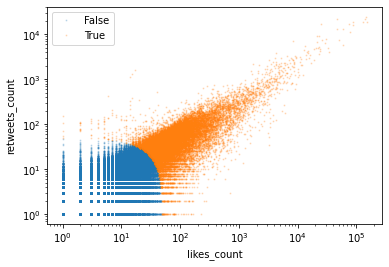

In [205]:
scatterviral(groups, 'likes_count', 'retweets_count', True, True)

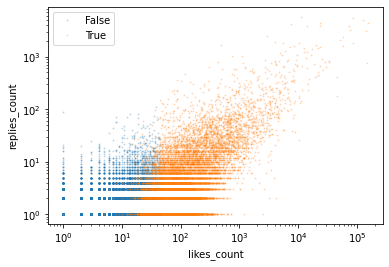

In [206]:
scatterviral(groups, 'likes_count', 'replies_count', True, True)

In [207]:
likes_to_viral = df[["likes_count", "label"]]
retweets_to_viral = df[["retweets_count", "label"]]
replies_to_viral = df[["replies_count", "label"]]

likes_groups = likes_to_viral.groupby('label')
retweets_groups = retweets_to_viral.groupby('label')
replies_groups = replies_to_viral.groupby('label')




In [208]:
likes_groups.describe()
# Learning: Likely not viral if likes < 50

likes_count                                                           
            count        mean          std  min   25%   50%    75%       max
label                                                                       
False    268651.0    5.419749     6.847849  0.0   1.0   3.0    8.0      49.0
True      27160.0  220.584352  2274.185469  0.0  38.0  56.0  107.0  151373.0

In [209]:
retweets_groups.describe()
# Learning: Likely not viral if retweets < 47

retweets_count                                                       
               count       mean         std  min   25%   50%   75%      max
label                                                                      
False       268651.0   3.977279    5.309888  0.0   0.0   2.0   6.0     46.0
True         27160.0  77.160825  439.857604  0.0  25.0  36.0  59.0  24699.0

In [210]:
replies_groups.describe()
# Learning: Does not explain virality as well, given percentile distributions are flat between true and false labelled tweets

replies_count                                                   
              count       mean         std  min  25%  50%  75%     max
label                                                                 
False      268651.0   0.291467    1.125718  0.0  0.0  0.0  0.0   110.0
True        27160.0  10.763697  106.084441  0.0  0.0  1.0  3.0  5811.0

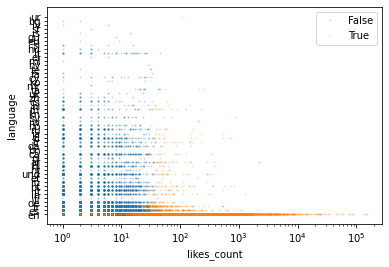

In [211]:
scatterviral(groups, 'likes_count', 'language', True, False)
# Learning: much more likely to be viral with < 50 likes if language is 'en'

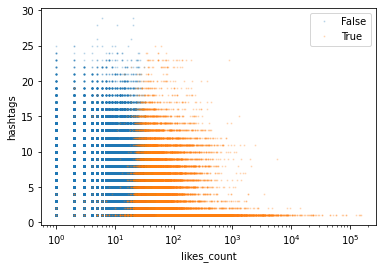

In [212]:
scatterviral(groups, 'likes_count', 'hashtags', True, False)

In [213]:
# filter by viral tweets
viral = likes_to_viral[likes_to_viral["label"] == 1]

viral["likes_count"].mean()

220.58435198821797

In [214]:
count = viral["likes_count"].value_counts()


count

33.0      509
35.0      506
38.0      501
36.0      495
32.0      475
         ... 
660.0       1
726.0       1
1452.0      1
1175.0      1
2090.0      1
Name: likes_count, Length: 1443, dtype: int64

<AxesSubplot:xlabel='[0]', ylabel='[0]'>

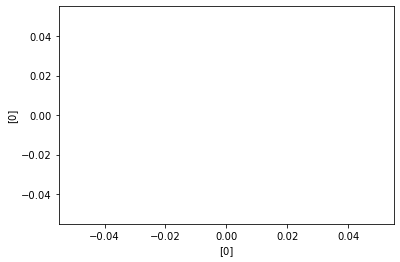

In [96]:
viral.plot.scatter(pd.DataFrame(['likes_count']), pd.DataFrame(['retweets_count']))

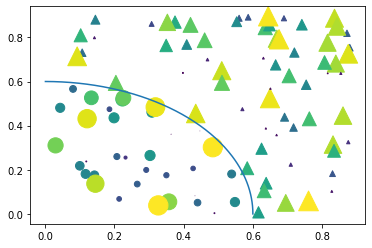